In [1]:
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [2]:
import os

RESULTS_PATH = 'results/'

# Get all of the result files for the notebooks
results = []
for root, dirs, files in os.walk(RESULTS_PATH):
    for file in files:
        if file.endswith('.csv'):  # Must be a CSV
            results.append(file)

In [3]:
import pandas as pd


def plot_chart(notebook):
    df = pd.read_csv(RESULTS_PATH + notebook + '.csv')

    df = df[df['model'] != 'SGD']
    df = df[df['model'] != 'RNNMultiple']
    df = df[df['model'] != 'RNNAll']

    df.plot(x='model', y=['train', 'test'], kind='bar', title=notebook, figsize=(15, 10), legend=True, fontsize=12)
    plt.ylabel('MAE Loss (Mean Average Error)')
    plt.show()

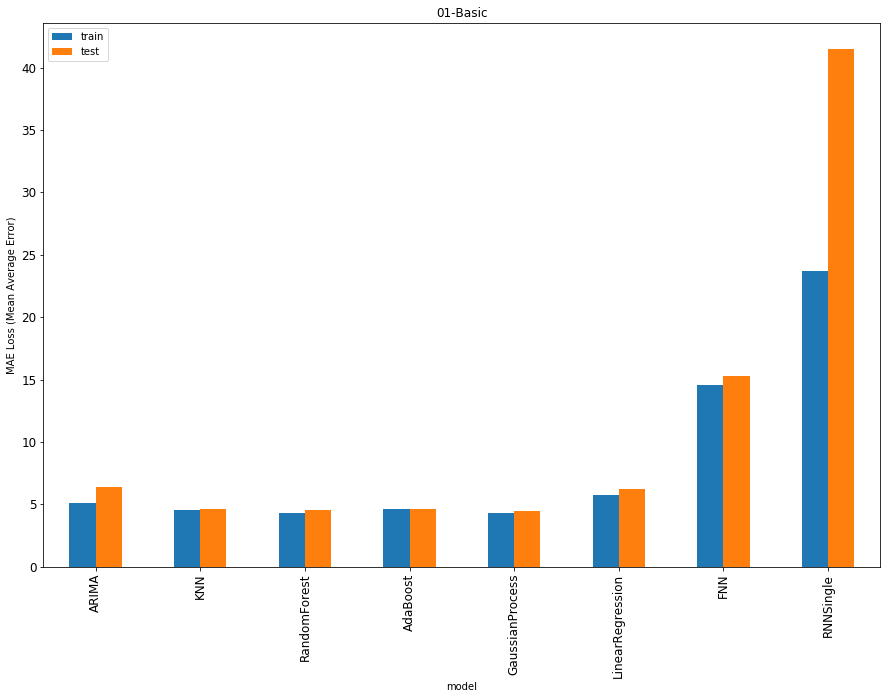

In [4]:
plot_chart('01-Basic')

# Chunk Data

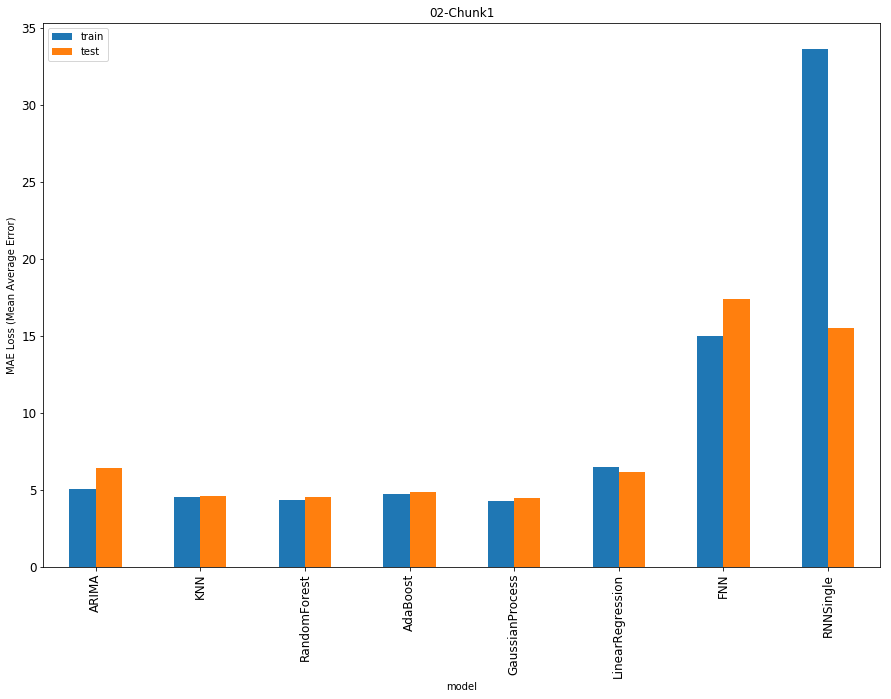

In [5]:
plot_chart('02-Chunk1')

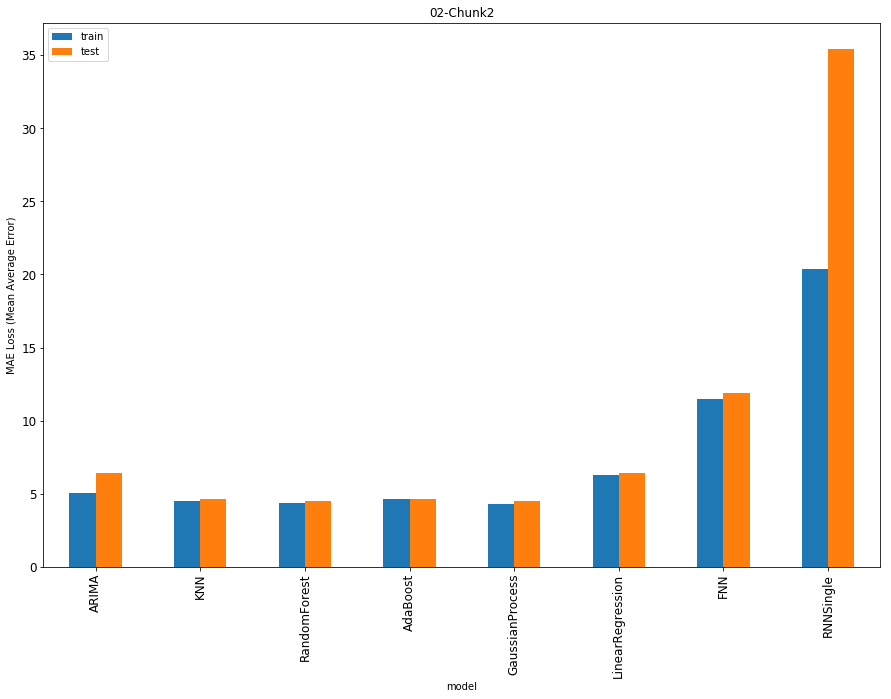

In [6]:
plot_chart('02-Chunk2')

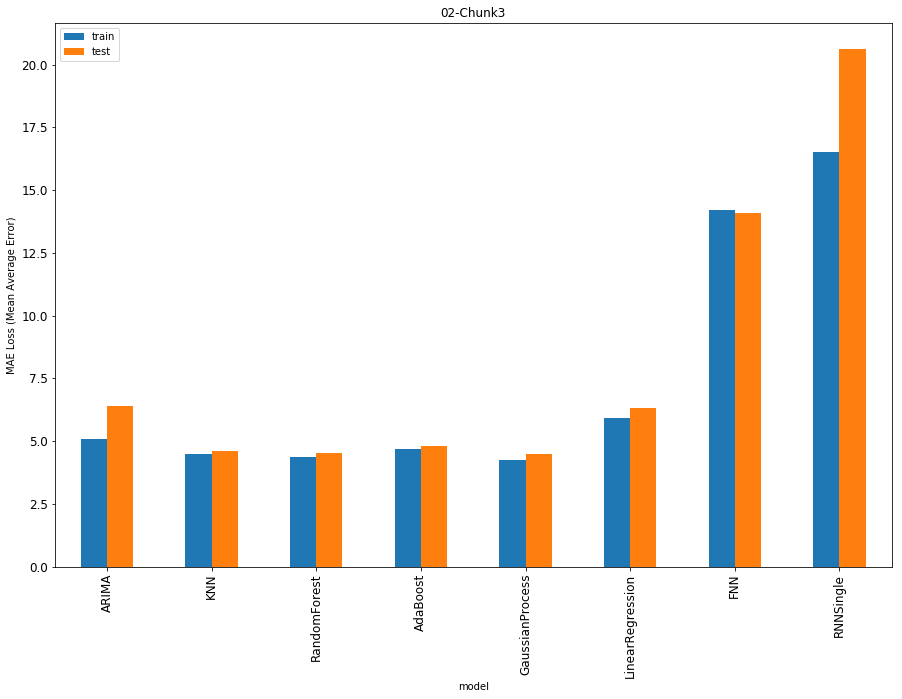

In [7]:
plot_chart('02-Chunk3')

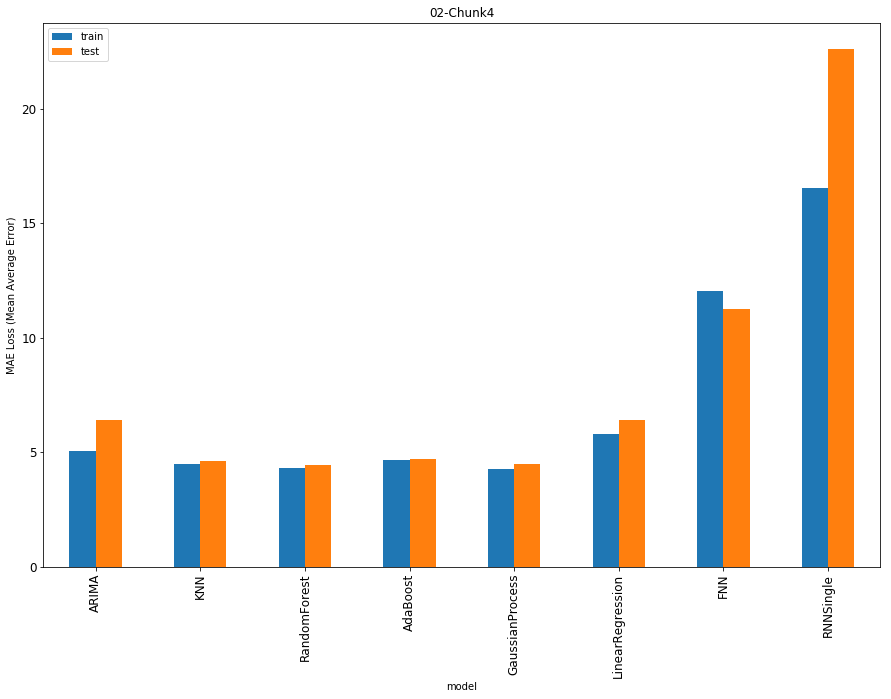

In [8]:
plot_chart('02-Chunk4')

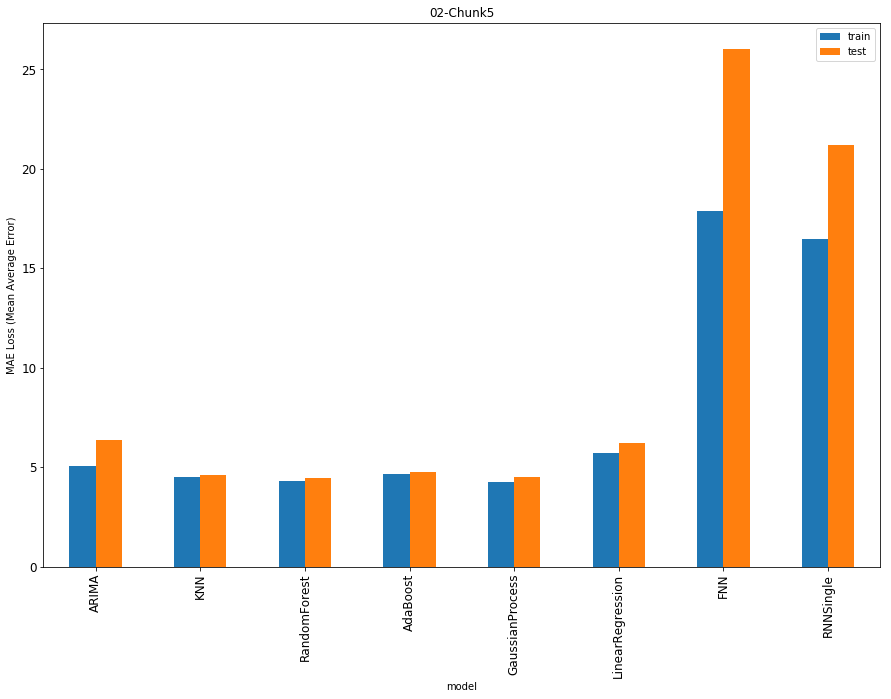

In [9]:
plot_chart('02-Chunk5')

# Features

### <YYYY, MM, DD>

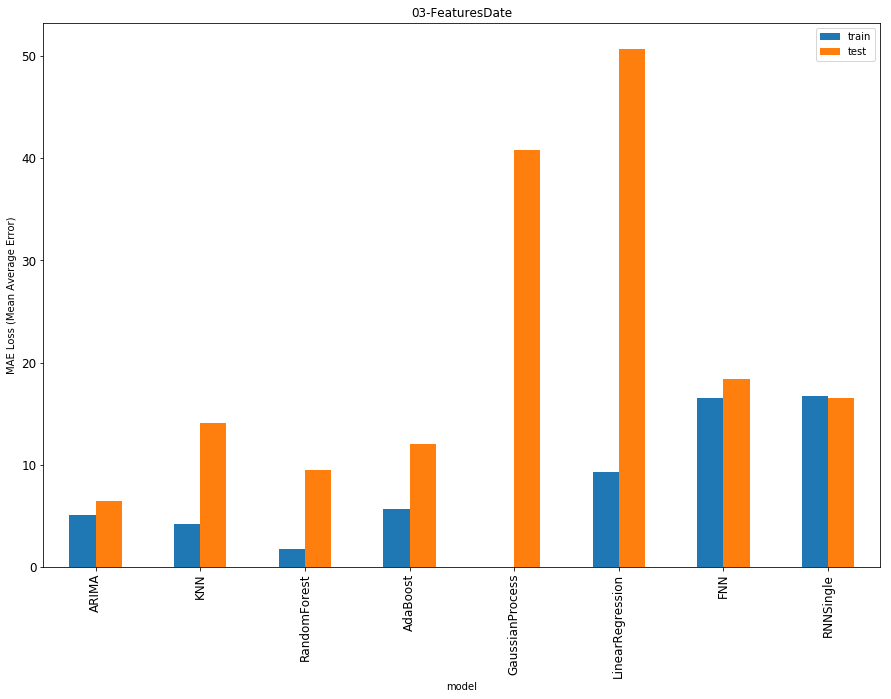

In [10]:
plot_chart('03-FeaturesDate')

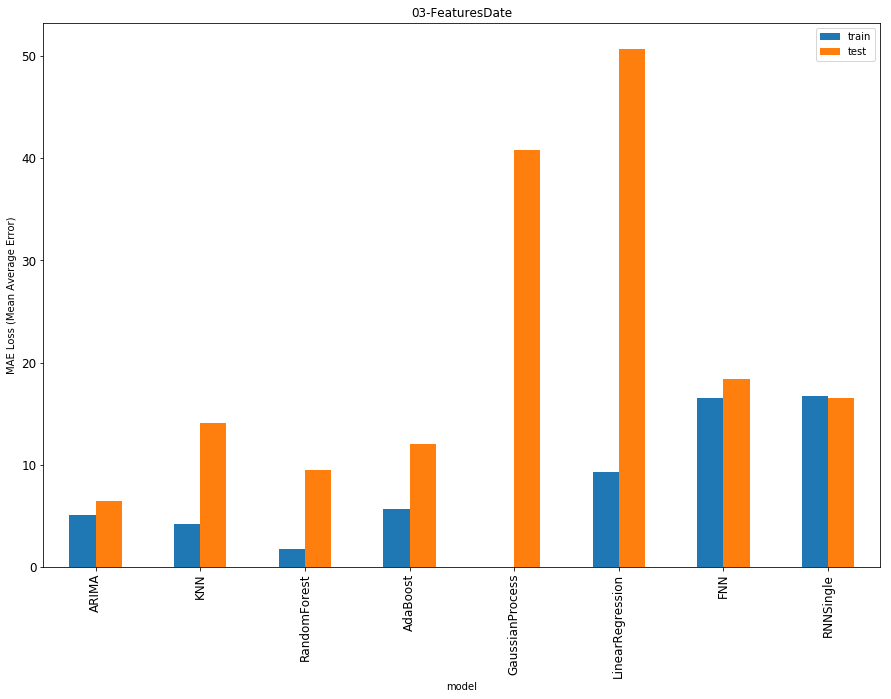

In [11]:
plot_chart('03-FeaturesDate')

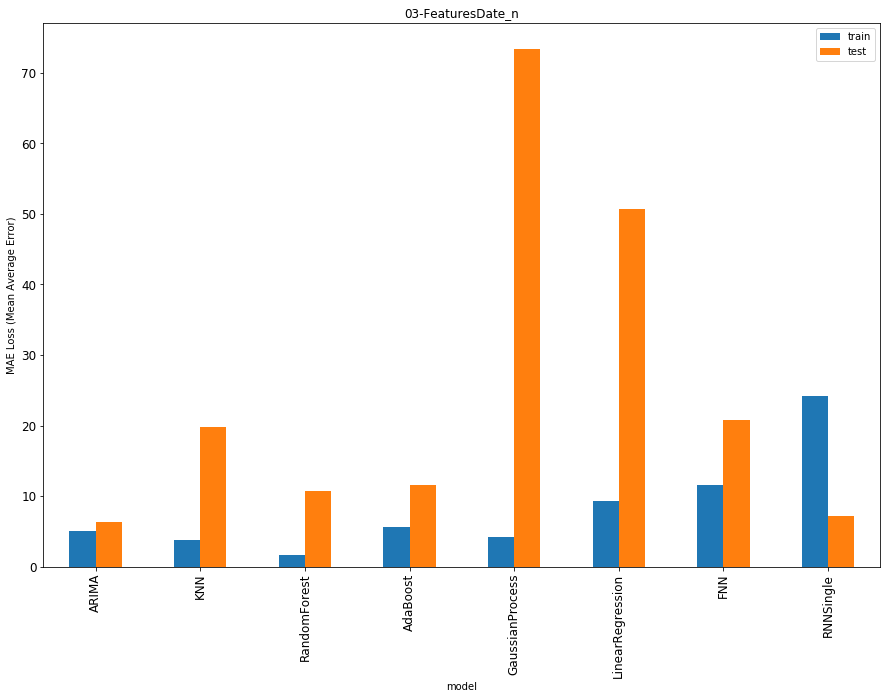

In [12]:
plot_chart('03-FeaturesDate_n')

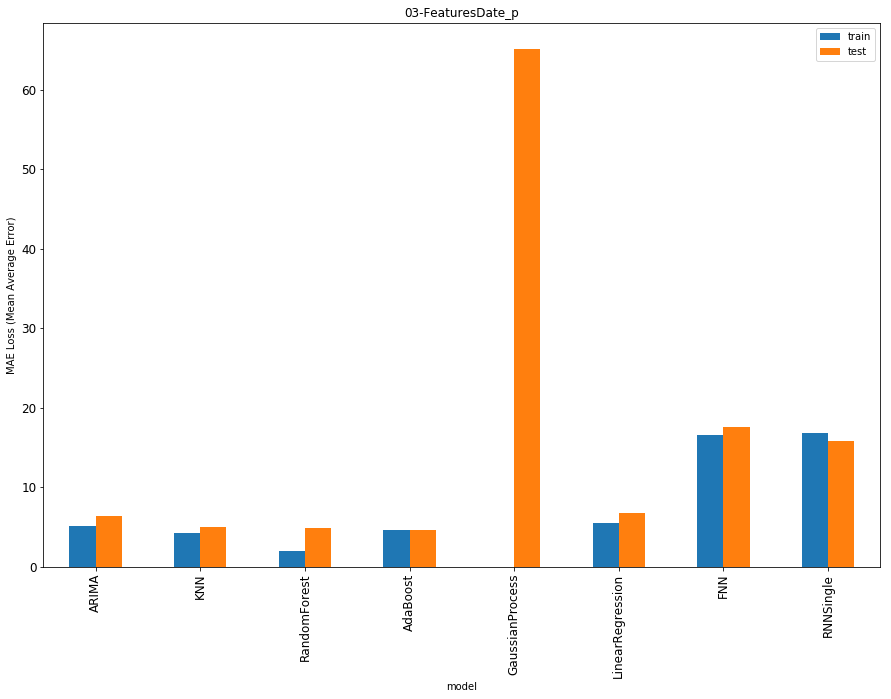

In [13]:
plot_chart('03-FeaturesDate_p')

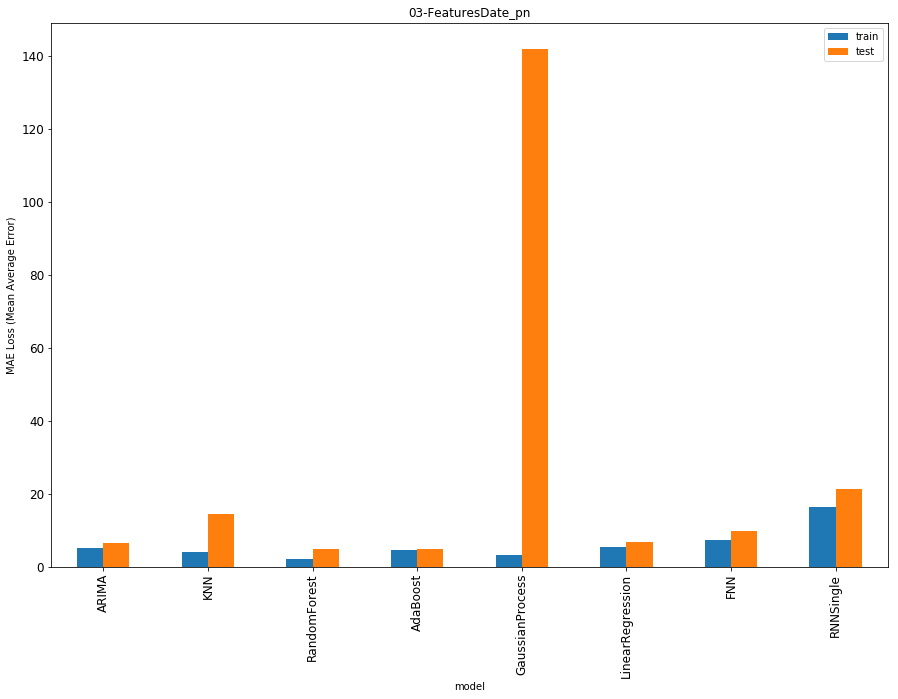

In [14]:
plot_chart('03-FeaturesDate_pn')

### <actual_min_temp, actual_max_temp, actual_precipitation>

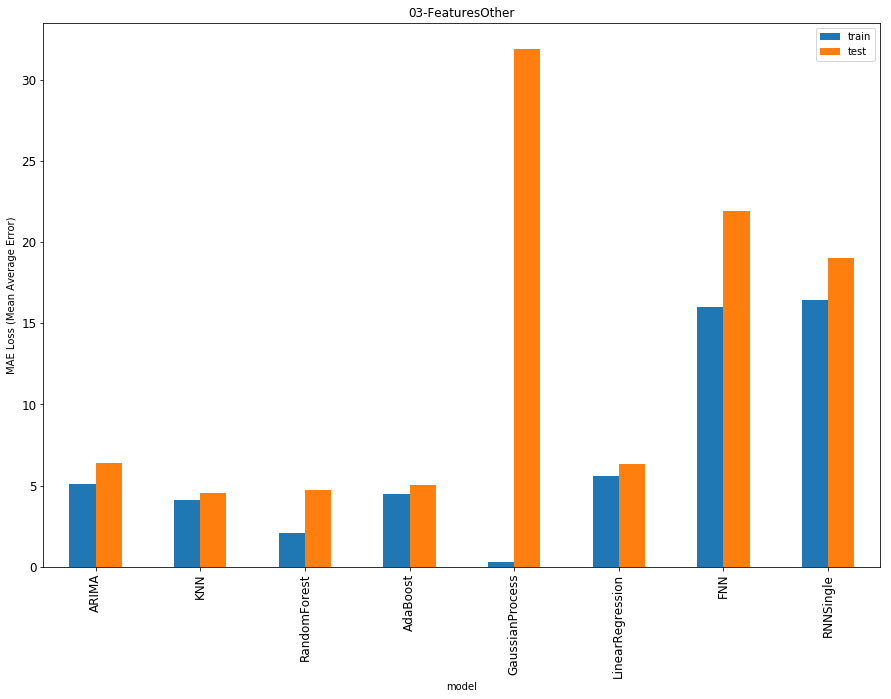

In [15]:
plot_chart('03-FeaturesOther')

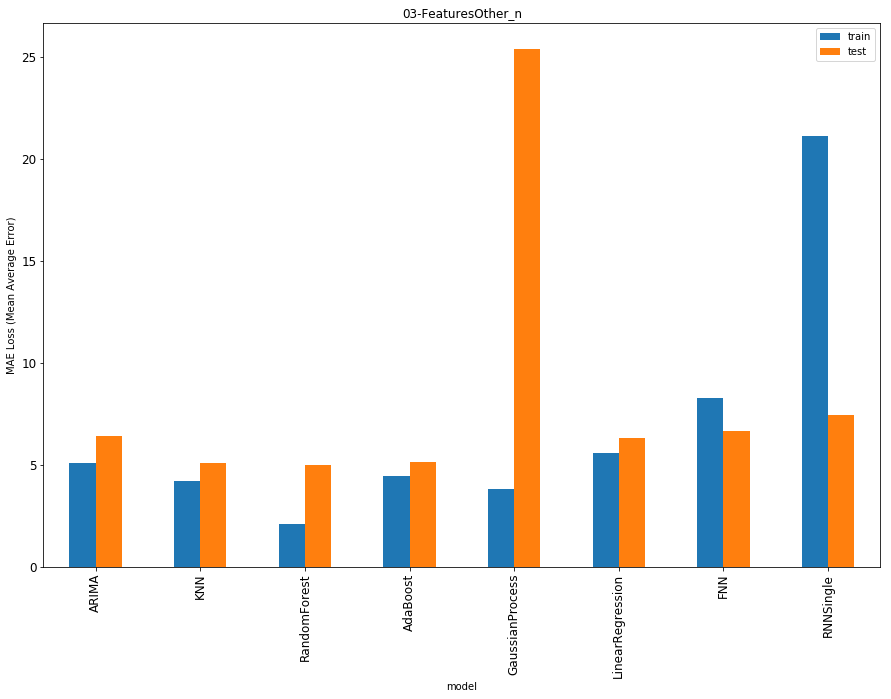

In [16]:
plot_chart('03-FeaturesOther_n')

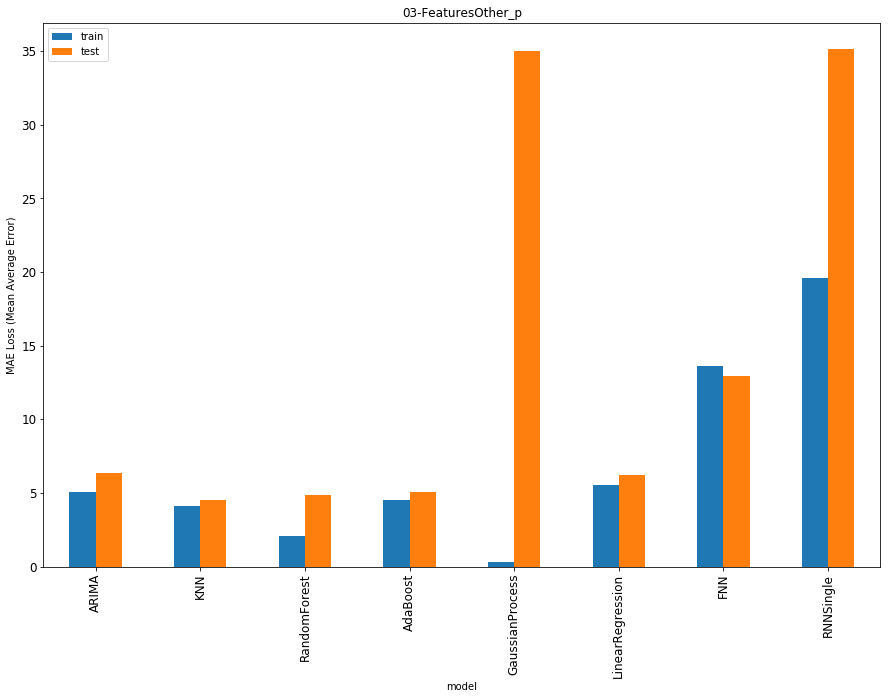

In [17]:
plot_chart('03-FeaturesOther_p')

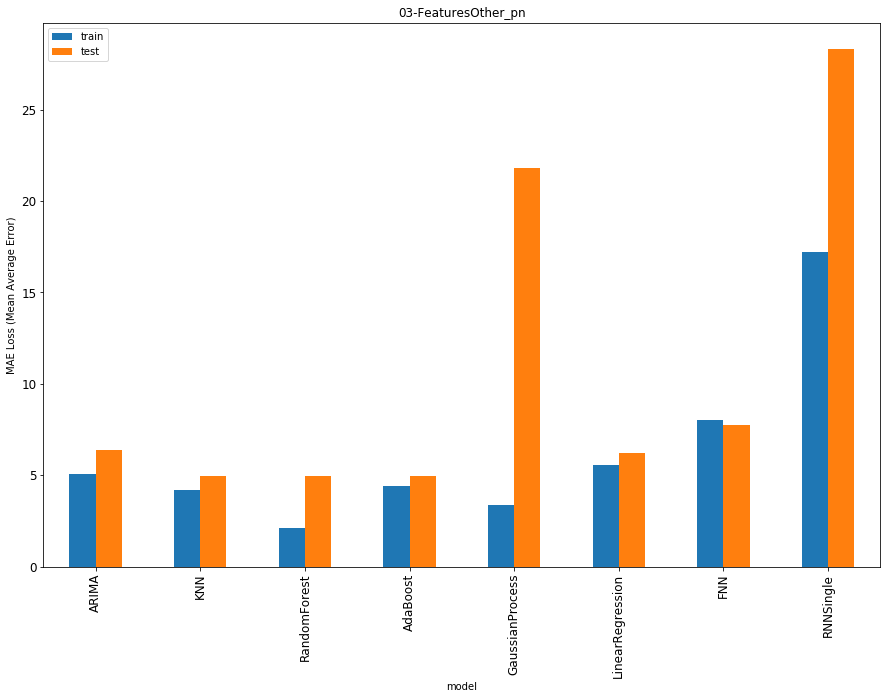

In [18]:
plot_chart('03-FeaturesOther_pn')